In [1]:
import matplotlib.pyplot as plt
from FBSDE import FBSNN
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from models import Toy3_G1

2026-02-11 16:59:14.817571: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1770829157.784614   19015 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11554 MB memory:  -> device: 0, name: AMD Radeon RX 7800 XT, pci bus id: 0000:28:00.0


In [3]:
M = 512
N = 100
D = 4
T = 1.0

params = {
        'mu1': np.float32(1.0),
        'mu2': np.float32(1.0),
        'mu3': np.float32(1.0),
        'c1': np.float32(1.0),
        'c2': np.float32(1.0),
        'c3': np.float32(1.0),
        's1': np.float32(0.001),
        's2': np.float32(0.001),
        's3': np.float32(0.001),
    }

Xi = np.array([1.5, 0.5, 0.5, 0.5]).reshape(1, D)

layers = [D+1] + 4*[256] + [1]

model = Toy3_G1(Xi, T, M, N, D, layers, params)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: AMD Radeon RX 7800 XT, pci bus id: 0000:28:00.0



I0000 00:00:1770829157.902041   19015 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11554 MB memory:  -> device: 0, name: AMD Radeon RX 7800 XT, pci bus id: 0000:28:00.0
I0000 00:00:1770829184.723676   19015 mlir_graph_optimization_pass.cc:437] MLIR V1 optimization pass is not enabled
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



truncated_normal/TruncatedNormal: (TruncatedNormal): /job:localhost/replica:0/task:0/device:GPU:0
truncated_normal/mul: (Mul): /job:localhost/replica:0/task:0/device:GPU:0
truncated_normal: (AddV2): /job:localhost/replica:0/task:0/device:GPU:0
Variable: (VariableV2): /job:localhost/replica:0/task:0/device:GPU:0
Variable/Assign: (Assign): /job:localhost/replica:0/task:0/device:GPU:0
Variable/read: (Identity): /job:localhost/replica:0/task:0/device:GPU:0
Variable_1: (VariableV2): /job:localhost/replica:0/task:0/device:GPU:0
Variable_1/Assign: (Assign): /job:localhost/replica:0/task:0/device:GPU:0
Variable_1/read: (Identity): /job:localhost/replica:0/task:0/device:GPU:0
truncated_normal_1/TruncatedNormal: (TruncatedNormal): /job:localhost/replica:0/task:0/device:GPU:0
truncated_normal_1/mul: (Mul): /job:localhost/replica:0/task:0/device:GPU:0
truncated_normal_1: (AddV2): /job:localhost/replica:0/task:0/device:GPU:0
Variable_2: (VariableV2): /job:localhost/replica:0/task:0/device:GPU:0
Var

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [ ]:
print("=== Avvio training (High Precision) ===")
    # Strategia di training a step
model.train(N_Iter = 500, learning_rate = 1e-3)
model.train(N_Iter = 500, learning_rate = 7e-4)
model.train(N_Iter = 500, learning_rate = 3e-4)
model.train(N_Iter = 1500, learning_rate = 1e-4)
model.train(N_Iter = 500, learning_rate = 1e-5)

=== Avvio training (High Precision) ===
It: 0, Loss: 1.434e+02, Y0: 4.843, Time: 19.72, Learning Rate: 1.000e-03
It: 10, Loss: 1.333e+02, Y0: 5.141, Time: 2.19, Learning Rate: 1.000e-03
It: 20, Loss: 1.295e+02, Y0: 4.825, Time: 2.24, Learning Rate: 1.000e-03
It: 30, Loss: 1.287e+02, Y0: 4.679, Time: 2.31, Learning Rate: 1.000e-03
It: 40, Loss: 1.278e+02, Y0: 4.445, Time: 2.24, Learning Rate: 1.000e-03
It: 50, Loss: 1.275e+02, Y0: 4.246, Time: 2.22, Learning Rate: 1.000e-03
It: 60, Loss: 1.274e+02, Y0: 4.109, Time: 2.22, Learning Rate: 1.000e-03
It: 70, Loss: 1.274e+02, Y0: 4.019, Time: 2.26, Learning Rate: 1.000e-03
It: 80, Loss: 1.274e+02, Y0: 3.945, Time: 2.26, Learning Rate: 1.000e-03
It: 90, Loss: 1.273e+02, Y0: 3.875, Time: 2.21, Learning Rate: 1.000e-03
It: 100, Loss: 1.273e+02, Y0: 3.829, Time: 2.28, Learning Rate: 1.000e-03
It: 110, Loss: 1.273e+02, Y0: 3.813, Time: 2.23, Learning Rate: 1.000e-03
It: 120, Loss: 1.273e+02, Y0: 3.781, Time: 2.20, Learning Rate: 1.000e-03
It: 130,


Predicted Y0: -0.8094
Exact Y0:     1.7500
Relative Error: 146.2511%


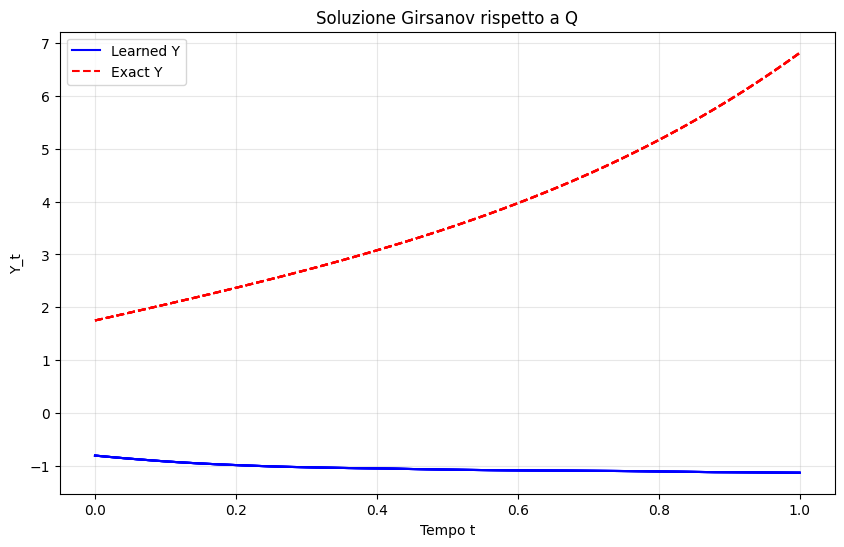

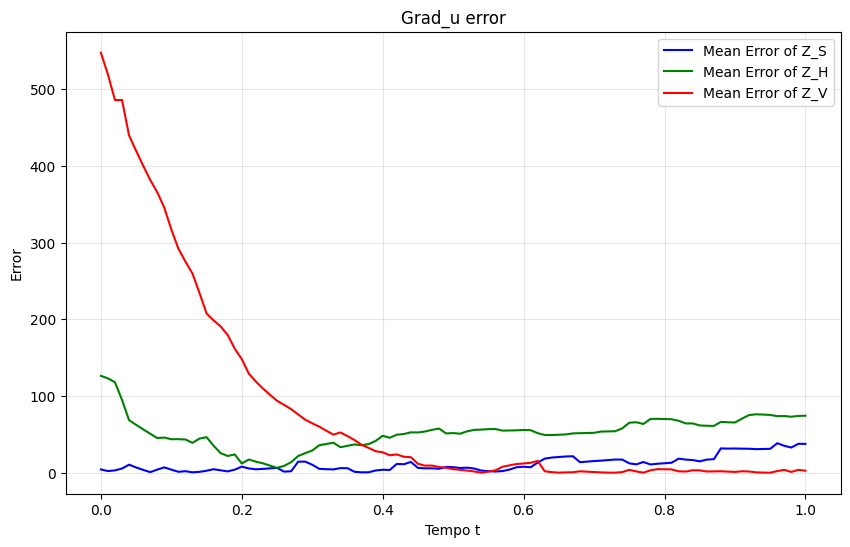

In [5]:
# --- PLOTTING ---
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred, Z_pred = model.predict(Xi, t_test, W_test)

def u_exact(t, Xi_arr):
        S = Xi_arr[:, 0:1]
        H = Xi_arr[:, 1:2]
        V = Xi_arr[:, 2:3]
        X = Xi_arr[:, 3:4]

        return X**2 + S * (V + H)

def z_exact(t, Xi_arr):
        S = Xi_arr[:, 0:1]
        H = Xi_arr[:, 1:2]
        V = Xi_arr[:, 2:3]
        X = Xi_arr[:, 3:4]
        r1 = params['s1'] * (V + H)
        r2 = params['s2'] * S
        r3 = params['s3'] * S
        r4 = np.zeros_like(S)

        return np.stack([r1, r2, r3, r4], axis=1)

Xi_reshaped = X_pred.reshape(-1, D)
t_reshaped = t_test.reshape(-1, 1)

    # Calcolo soluzione esatta sui punti predetti
Y_exact = u_exact(t_reshaped, Xi_reshaped).reshape(M, N+1, 1)
Z_exact = z_exact(t_reshaped, Xi_reshaped).reshape(M, N+1, 4, 1)


exact_Y0 = u_exact(np.array([[0.0]]), Xi)[0,0]
print(f"\nPredicted Y0: {Y_pred[0,0,0]:.4f}")
print(f"Exact Y0:     {exact_Y0:.4f}")
print(f"Relative Error: {100*np.abs((Y_pred[0,0,0] - exact_Y0)/exact_Y0):.4f}%")

plt.figure(figsize=(10,6))
plt.plot(t_test[0,:,0], Y_pred[0,:,0], 'b', label='Learned Y')
plt.plot(t_test[0,:,0], Y_exact[0,:,0], 'r--', label='Exact Y')
    # Plot di altre traiettorie per vedere la varianza
plt.plot(t_test[1:5,:,0].T, Y_pred[1:5,:,0].T, 'b')
plt.plot(t_test[1:5,:,0].T, Y_exact[1:5,:,0].T, 'r--')
plt.title("Soluzione Girsanov rispetto a Q")
plt.xlabel("Tempo t")
plt.ylabel("Y_t")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#print(Z_pred.shape)

plt.figure(figsize=(10,6))
plt.plot(t_test[0,:,0], np.mean(np.abs((Z_pred[:,:,0]-Z_exact[:,:,0,0])/Z_exact[:,:,0,0]),axis=0), 'b', label='Mean Error of Z_S')
plt.plot(t_test[0,:,0], np.mean(np.abs((Z_pred[:,:,1]-Z_exact[:,:,1,0])/Z_exact[:,:,0,0]),axis=0), 'g', label='Mean Error of Z_H')
plt.plot(t_test[0,:,0], np.mean(np.abs((Z_pred[:,:,2]-Z_exact[:,:,2,0])/Z_exact[:,:,0,0]),axis=0), 'r', label='Mean Error of Z_V')
plt.title("Grad_u error")
plt.xlabel("Tempo t")
plt.ylabel("Error")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [7]:
model.T = 2
model.train(N_Iter = 500, learning_rate = 7e-4)
model.train(N_Iter = 500, learning_rate = 3e-4)
model.train(N_Iter = 1500, learning_rate = 1e-4)
model.train(N_Iter = 500, learning_rate = 1e-5)

It: 0, Loss: 1.045e+00, Y0: 1.513, Time: 0.22, Learning Rate: 7.000e-04
It: 10, Loss: 1.082e+02, Y0: 5.732, Time: 2.09, Learning Rate: 7.000e-04
It: 20, Loss: 9.402e+01, Y0: 4.170, Time: 2.07, Learning Rate: 7.000e-04
It: 30, Loss: 2.159e+01, Y0: 4.397, Time: 2.06, Learning Rate: 7.000e-04
It: 40, Loss: 9.945e+00, Y0: 4.520, Time: 2.19, Learning Rate: 7.000e-04
It: 50, Loss: 6.209e+00, Y0: 4.080, Time: 2.09, Learning Rate: 7.000e-04
It: 60, Loss: 4.023e+00, Y0: 3.896, Time: 2.16, Learning Rate: 7.000e-04
It: 70, Loss: 2.912e+00, Y0: 3.824, Time: 2.14, Learning Rate: 7.000e-04
It: 80, Loss: 2.422e+00, Y0: 3.677, Time: 2.17, Learning Rate: 7.000e-04
It: 90, Loss: 2.149e+00, Y0: 3.432, Time: 2.16, Learning Rate: 7.000e-04
It: 100, Loss: 2.030e+00, Y0: 3.332, Time: 2.15, Learning Rate: 7.000e-04
It: 110, Loss: 1.968e+00, Y0: 3.210, Time: 2.15, Learning Rate: 7.000e-04
It: 120, Loss: 1.875e+00, Y0: 3.112, Time: 2.15, Learning Rate: 7.000e-04
It: 130, Loss: 1.660e+00, Y0: 3.026, Time: 2.21, 


Predicted Y0: 1.5115
Exact Y0:     1.7500
Relative Error: 13.6307%


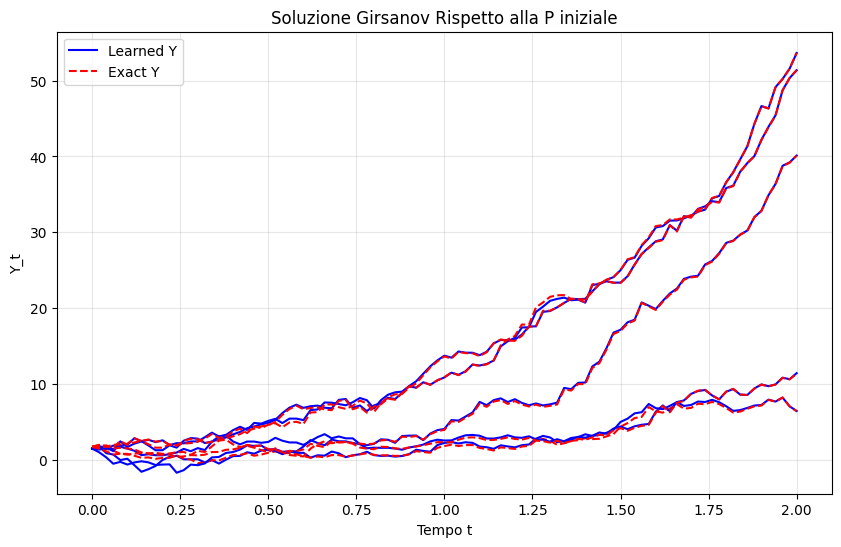

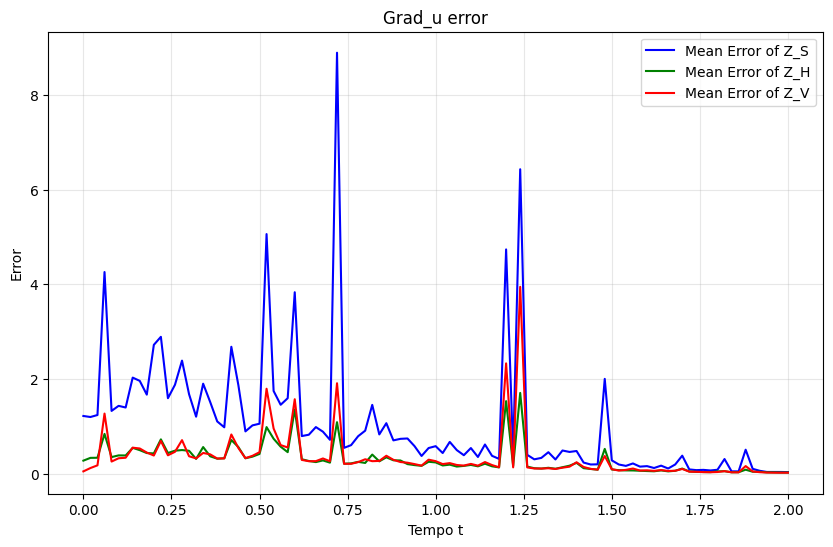

In [8]:
# --- PLOTTING ---
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred, Z_pred = model.predict(Xi, t_test, W_test)

def u_exact(t, Xi_arr):
        S = Xi_arr[:, 0:1]
        H = Xi_arr[:, 1:2]
        V = Xi_arr[:, 2:3]
        X = Xi_arr[:, 3:4]

        return X**2 + S * (V + H)

def z_exact(t, Xi_arr):
        S = Xi_arr[:, 0:1]
        H = Xi_arr[:, 1:2]
        V = Xi_arr[:, 2:3]
        X = Xi_arr[:, 3:4]
        r1 = params['s1'] * (V + H)
        r2 = params['s2'] * S
        r3 = params['s3'] * S
        r4 = np.zeros_like(S)

        return np.stack([r1, r2, r3, r4], axis=1)

Xi_reshaped = X_pred.reshape(-1, D)
t_reshaped = t_test.reshape(-1, 1)

    # Calcolo soluzione esatta sui punti predetti
Y_exact = u_exact(t_reshaped, Xi_reshaped).reshape(M, N+1, 1)
Z_exact = z_exact(t_reshaped, Xi_reshaped).reshape(M, N+1, 4, 1)


exact_Y0 = u_exact(np.array([[0.0]]), Xi)[0,0]
print(f"\nPredicted Y0: {Y_pred[0,0,0]:.4f}")
print(f"Exact Y0:     {exact_Y0:.4f}")
print(f"Relative Error: {100*np.abs((Y_pred[0,0,0] - exact_Y0)/exact_Y0):.4f}%")

plt.figure(figsize=(10,6))
plt.plot(t_test[0,:,0], Y_pred[0,:,0], 'b', label='Learned Y')
plt.plot(t_test[0,:,0], Y_exact[0,:,0], 'r--', label='Exact Y')
    # Plot di altre traiettorie per vedere la varianza
plt.plot(t_test[1:5,:,0].T, Y_pred[1:5,:,0].T, 'b')
plt.plot(t_test[1:5,:,0].T, Y_exact[1:5,:,0].T, 'r--')
plt.title("Soluzione Girsanov Rispetto alla P iniziale")
plt.xlabel("Tempo t")
plt.ylabel("Y_t")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#print(Z_pred.shape)

plt.figure(figsize=(10,6))
plt.plot(t_test[0,:,0], np.mean(np.abs((Z_pred[:,:,0]-Z_exact[:,:,0,0])/Z_exact[:,:,0,0]),axis=0), 'b', label='Mean Error of Z_S')
plt.plot(t_test[0,:,0], np.mean(np.abs((Z_pred[:,:,1]-Z_exact[:,:,1,0])/Z_exact[:,:,0,0]),axis=0), 'g', label='Mean Error of Z_H')
plt.plot(t_test[0,:,0], np.mean(np.abs((Z_pred[:,:,2]-Z_exact[:,:,2,0])/Z_exact[:,:,0,0]),axis=0), 'r', label='Mean Error of Z_V')
plt.title("Grad_u error")
plt.xlabel("Tempo t")
plt.ylabel("Error")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [9]:
model.T = 3
model.train(N_Iter = 500, learning_rate = 7e-4)
model.train(N_Iter = 500, learning_rate = 3e-4)
model.train(N_Iter = 1500, learning_rate = 1e-4)
model.train(N_Iter = 500, learning_rate = 1e-5)

It: 0, Loss: 1.691e+04, Y0: 1.583, Time: 0.21, Learning Rate: 7.000e-04
It: 10, Loss: 2.708e+03, Y0: 0.205, Time: 2.17, Learning Rate: 7.000e-04
It: 20, Loss: 4.864e+02, Y0: 2.084, Time: 2.05, Learning Rate: 7.000e-04
It: 30, Loss: 1.817e+02, Y0: 3.934, Time: 2.08, Learning Rate: 7.000e-04
It: 40, Loss: 7.593e+01, Y0: 3.865, Time: 2.09, Learning Rate: 7.000e-04
It: 50, Loss: 2.874e+01, Y0: 3.221, Time: 2.13, Learning Rate: 7.000e-04
It: 60, Loss: 1.729e+01, Y0: 3.071, Time: 2.07, Learning Rate: 7.000e-04
It: 70, Loss: 1.852e+01, Y0: 2.812, Time: 2.05, Learning Rate: 7.000e-04
It: 80, Loss: 1.656e+01, Y0: 3.155, Time: 2.13, Learning Rate: 7.000e-04
It: 90, Loss: 1.351e+01, Y0: 3.073, Time: 2.10, Learning Rate: 7.000e-04
It: 100, Loss: 1.627e+01, Y0: 3.096, Time: 2.14, Learning Rate: 7.000e-04
It: 110, Loss: 1.056e+01, Y0: 3.106, Time: 2.14, Learning Rate: 7.000e-04
It: 120, Loss: 1.206e+01, Y0: 3.831, Time: 2.14, Learning Rate: 7.000e-04
It: 130, Loss: 9.338e+00, Y0: 3.799, Time: 2.15, 


Predicted Y0: 4.2355
Exact Y0:     1.7500
Relative Error: 142.0269%


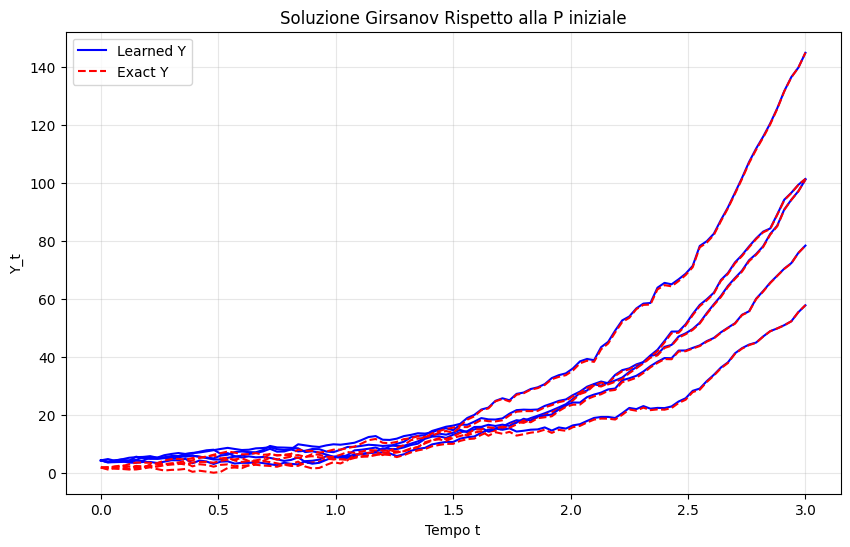

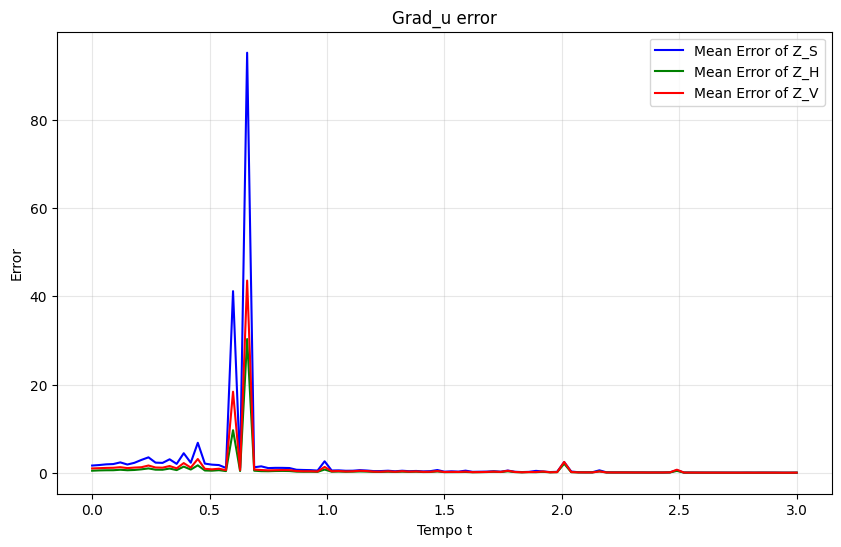

In [10]:
# --- PLOTTING ---
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred, Z_pred = model.predict(Xi, t_test, W_test)

def u_exact(t, Xi_arr):
        S = Xi_arr[:, 0:1]
        H = Xi_arr[:, 1:2]
        V = Xi_arr[:, 2:3]
        X = Xi_arr[:, 3:4]

        return X**2 + S * (V + H)

def z_exact(t, Xi_arr):
        S = Xi_arr[:, 0:1]
        H = Xi_arr[:, 1:2]
        V = Xi_arr[:, 2:3]
        X = Xi_arr[:, 3:4]
        r1 = params['s1'] * (V + H)
        r2 = params['s2'] * S
        r3 = params['s3'] * S
        r4 = np.zeros_like(S)

        return np.stack([r1, r2, r3, r4], axis=1)

Xi_reshaped = X_pred.reshape(-1, D)
t_reshaped = t_test.reshape(-1, 1)

    # Calcolo soluzione esatta sui punti predetti
Y_exact = u_exact(t_reshaped, Xi_reshaped).reshape(M, N+1, 1)
Z_exact = z_exact(t_reshaped, Xi_reshaped).reshape(M, N+1, 4, 1)


exact_Y0 = u_exact(np.array([[0.0]]), Xi)[0,0]
print(f"\nPredicted Y0: {Y_pred[0,0,0]:.4f}")
print(f"Exact Y0:     {exact_Y0:.4f}")
print(f"Relative Error: {100*np.abs((Y_pred[0,0,0] - exact_Y0)/exact_Y0):.4f}%")

plt.figure(figsize=(10,6))
plt.plot(t_test[0,:,0], Y_pred[0,:,0], 'b', label='Learned Y')
plt.plot(t_test[0,:,0], Y_exact[0,:,0], 'r--', label='Exact Y')
    # Plot di altre traiettorie per vedere la varianza
plt.plot(t_test[1:5,:,0].T, Y_pred[1:5,:,0].T, 'b')
plt.plot(t_test[1:5,:,0].T, Y_exact[1:5,:,0].T, 'r--')
plt.title("Soluzione Girsanov Rispetto alla P iniziale")
plt.xlabel("Tempo t")
plt.ylabel("Y_t")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#print(Z_pred.shape)

plt.figure(figsize=(10,6))
plt.plot(t_test[0,:,0], np.mean(np.abs((Z_pred[:,:,0]-Z_exact[:,:,0,0])/Z_exact[:,:,0,0]),axis=0), 'b', label='Mean Error of Z_S')
plt.plot(t_test[0,:,0], np.mean(np.abs((Z_pred[:,:,1]-Z_exact[:,:,1,0])/Z_exact[:,:,0,0]),axis=0), 'g', label='Mean Error of Z_H')
plt.plot(t_test[0,:,0], np.mean(np.abs((Z_pred[:,:,2]-Z_exact[:,:,2,0])/Z_exact[:,:,0,0]),axis=0), 'r', label='Mean Error of Z_V')
plt.title("Grad_u error")
plt.xlabel("Tempo t")
plt.ylabel("Error")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [11]:
model.T = 4
model.train(N_Iter = 500, learning_rate = 7e-4)
model.train(N_Iter = 500, learning_rate = 3e-4)
model.train(N_Iter = 1500, learning_rate = 1e-4)
model.train(N_Iter = 500, learning_rate = 1e-5)

It: 0, Loss: 1.113e+05, Y0: 4.377, Time: 0.21, Learning Rate: 7.000e-04
It: 10, Loss: 1.149e+04, Y0: 6.448, Time: 2.13, Learning Rate: 7.000e-04
It: 20, Loss: 5.141e+03, Y0: 6.082, Time: 2.10, Learning Rate: 7.000e-04
It: 30, Loss: 2.348e+03, Y0: 1.061, Time: 2.05, Learning Rate: 7.000e-04
It: 40, Loss: 7.460e+02, Y0: 0.397, Time: 2.12, Learning Rate: 7.000e-04
It: 50, Loss: 2.311e+02, Y0: 0.791, Time: 2.14, Learning Rate: 7.000e-04
It: 60, Loss: 1.112e+02, Y0: 1.387, Time: 2.15, Learning Rate: 7.000e-04
It: 70, Loss: 1.058e+02, Y0: 1.494, Time: 2.10, Learning Rate: 7.000e-04
It: 80, Loss: 1.726e+02, Y0: 1.356, Time: 2.07, Learning Rate: 7.000e-04
It: 90, Loss: 1.024e+02, Y0: 1.280, Time: 2.18, Learning Rate: 7.000e-04
It: 100, Loss: 1.114e+02, Y0: 1.057, Time: 2.17, Learning Rate: 7.000e-04
It: 110, Loss: 7.241e+01, Y0: 0.949, Time: 2.12, Learning Rate: 7.000e-04
It: 120, Loss: 7.979e+01, Y0: 0.912, Time: 2.11, Learning Rate: 7.000e-04
It: 130, Loss: 4.891e+01, Y0: 0.921, Time: 2.14, 


Predicted Y0: 4.2965
Exact Y0:     1.7500
Relative Error: 145.5155%


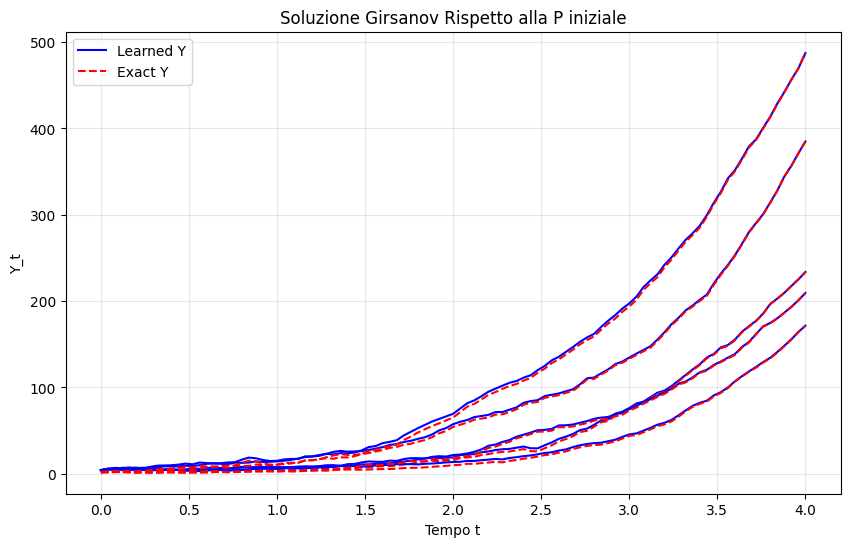

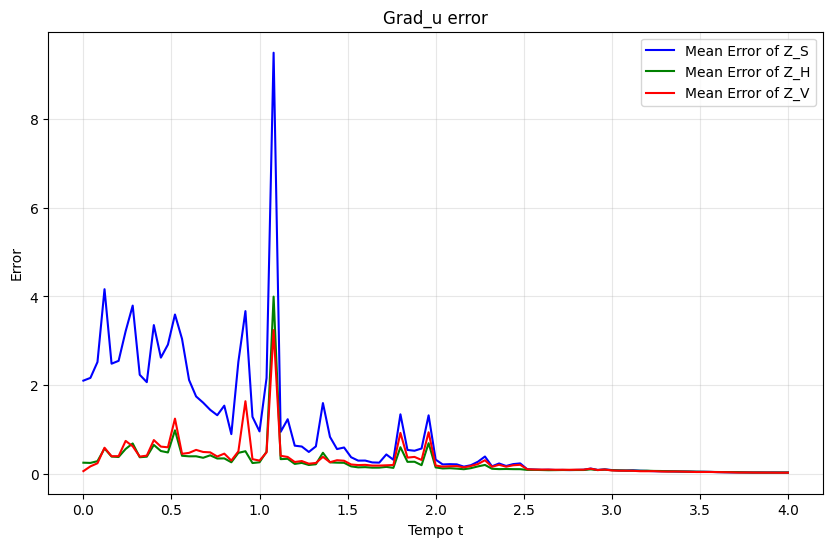

In [12]:
# --- PLOTTING ---
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred, Z_pred = model.predict(Xi, t_test, W_test)

def u_exact(t, Xi_arr):
        S = Xi_arr[:, 0:1]
        H = Xi_arr[:, 1:2]
        V = Xi_arr[:, 2:3]
        X = Xi_arr[:, 3:4]

        return X**2 + S * (V + H)

def z_exact(t, Xi_arr):
        S = Xi_arr[:, 0:1]
        H = Xi_arr[:, 1:2]
        V = Xi_arr[:, 2:3]
        X = Xi_arr[:, 3:4]
        r1 = params['s1'] * (V + H)
        r2 = params['s2'] * S
        r3 = params['s3'] * S
        r4 = np.zeros_like(S)

        return np.stack([r1, r2, r3, r4], axis=1)

Xi_reshaped = X_pred.reshape(-1, D)
t_reshaped = t_test.reshape(-1, 1)

    # Calcolo soluzione esatta sui punti predetti
Y_exact = u_exact(t_reshaped, Xi_reshaped).reshape(M, N+1, 1)
Z_exact = z_exact(t_reshaped, Xi_reshaped).reshape(M, N+1, 4, 1)


exact_Y0 = u_exact(np.array([[0.0]]), Xi)[0,0]
print(f"\nPredicted Y0: {Y_pred[0,0,0]:.4f}")
print(f"Exact Y0:     {exact_Y0:.4f}")
print(f"Relative Error: {100*np.abs((Y_pred[0,0,0] - exact_Y0)/exact_Y0):.4f}%")

plt.figure(figsize=(10,6))
plt.plot(t_test[0,:,0], Y_pred[0,:,0], 'b', label='Learned Y')
plt.plot(t_test[0,:,0], Y_exact[0,:,0], 'r--', label='Exact Y')
    # Plot di altre traiettorie per vedere la varianza
plt.plot(t_test[1:5,:,0].T, Y_pred[1:5,:,0].T, 'b')
plt.plot(t_test[1:5,:,0].T, Y_exact[1:5,:,0].T, 'r--')
plt.title("Soluzione Girsanov Rispetto alla P iniziale")
plt.xlabel("Tempo t")
plt.ylabel("Y_t")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#print(Z_pred.shape)

plt.figure(figsize=(10,6))
plt.plot(t_test[0,:,0], np.mean(np.abs((Z_pred[:,:,0]-Z_exact[:,:,0,0])/Z_exact[:,:,0,0]),axis=0), 'b', label='Mean Error of Z_S')
plt.plot(t_test[0,:,0], np.mean(np.abs((Z_pred[:,:,1]-Z_exact[:,:,1,0])/Z_exact[:,:,0,0]),axis=0), 'g', label='Mean Error of Z_H')
plt.plot(t_test[0,:,0], np.mean(np.abs((Z_pred[:,:,2]-Z_exact[:,:,2,0])/Z_exact[:,:,0,0]),axis=0), 'r', label='Mean Error of Z_V')
plt.title("Grad_u error")
plt.xlabel("Tempo t")
plt.ylabel("Error")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
import types

def mu_tf(self, t, X, Y, Z):
        S, H, V, X_state = tf.split(X, num_or_size_splits=4, axis=1)
        Z_S, Z_H, Z_V, _ = tf.split(Z, num_or_size_splits=4, axis=1)

        mu1 = tf.cast(self.mu1, tf.float32)
        mu2 = tf.cast(self.mu2, tf.float32)
        mu3 = tf.cast(self.mu3, tf.float32)
        c1 = tf.cast(self.c1, tf.float32)
        c2 = tf.cast(self.c2, tf.float32)
        c3 = tf.cast(self.c3, tf.float32)
        s1 = tf.cast(self.s1, tf.float32)
        s2 = tf.cast(self.s2, tf.float32)
        s3 = tf.cast(self.s3, tf.float32)

        V_as_Z = (1 * Z_S) / s1 - H
        
        dS = mu1 * (c1 - S)
        dH = mu2 * (c2 - H)
        dV = mu3 * (c3 - V_as_Z)
        dX = V

        return tf.concat([dS, dH, dV, dX], axis=1)

def phi_tf(self, t, X, Y, Z):
        S, H, V, X_state = tf.split(X, num_or_size_splits=4, axis=1)
        Z_S, Z_H, Z_V, _ = tf.split(Z, num_or_size_splits=4, axis=1)

        mu1 = tf.cast(self.mu1, tf.float32)
        mu2 = tf.cast(self.mu2, tf.float32)
        mu3 = tf.cast(self.mu3, tf.float32)
        c1 = tf.cast(self.c1, tf.float32)
        c2 = tf.cast(self.c2, tf.float32)
        c3 = tf.cast(self.c3, tf.float32)
        s1 = tf.cast(self.s1, tf.float32)
        s2 = tf.cast(self.s2, tf.float32)
        s3 = tf.cast(self.s3, tf.float32)

        return (2*X_state*V + mu1 * (c1 - S) * Z_S / s1 + mu2*(c2-H) * Z_H / s2 + mu3 * (c3-V) * Z_V / s3) - mu3 * (1 - 1) * Z_S * Z_V / (s1 * s3)

model.mu_tf = types.MethodType(mu_tf, model)
model.phi_tf = types.MethodType(phi_tf, model)



Predicted Y0: 4.2965
Exact Y0:     1.7500
Relative Error: 145.5155%


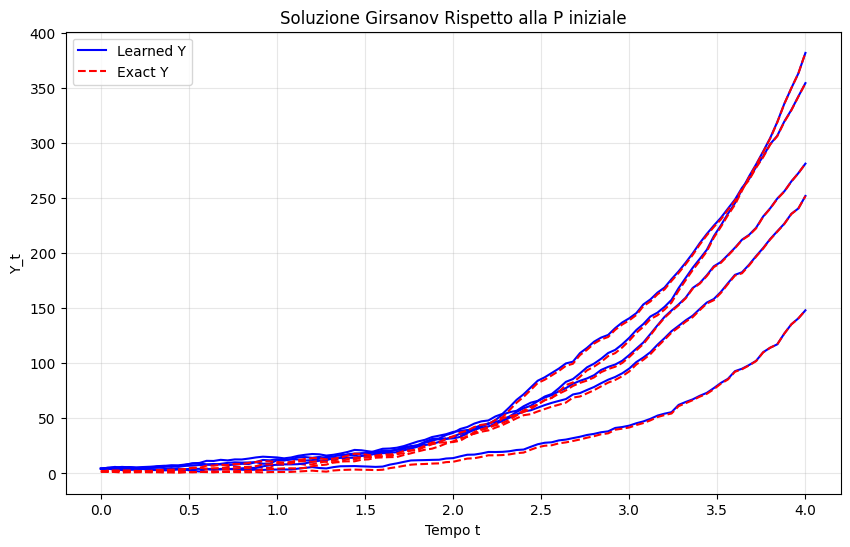

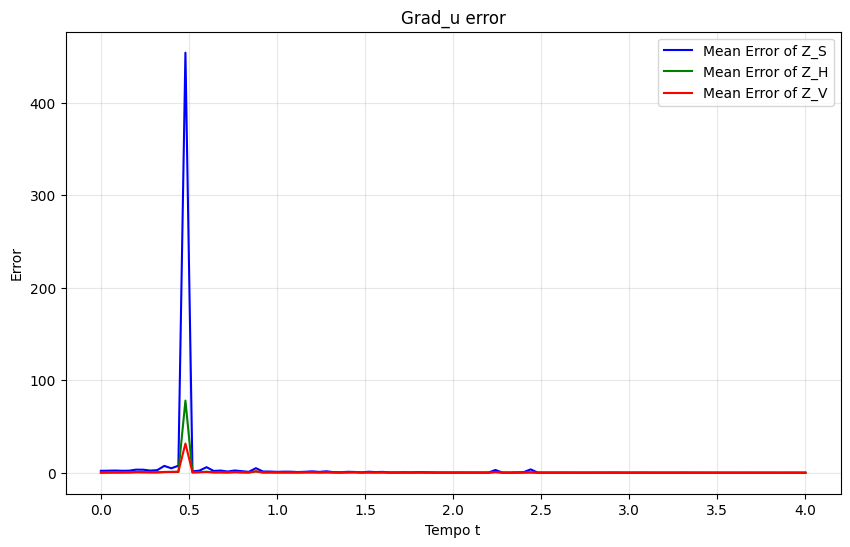

In [14]:
# --- PLOTTING ---
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred, Z_pred = model.predict(Xi, t_test, W_test)

def u_exact(t, Xi_arr):
        S = Xi_arr[:, 0:1]
        H = Xi_arr[:, 1:2]
        V = Xi_arr[:, 2:3]
        X = Xi_arr[:, 3:4]

        return X**2 + S * (V + H)

def z_exact(t, Xi_arr):
        S = Xi_arr[:, 0:1]
        H = Xi_arr[:, 1:2]
        V = Xi_arr[:, 2:3]
        X = Xi_arr[:, 3:4]
        r1 = params['s1'] * (V + H)
        r2 = params['s2'] * S
        r3 = params['s3'] * S
        r4 = np.zeros_like(S)

        return np.stack([r1, r2, r3, r4], axis=1)

Xi_reshaped = X_pred.reshape(-1, D)
t_reshaped = t_test.reshape(-1, 1)

    # Calcolo soluzione esatta sui punti predetti
Y_exact = u_exact(t_reshaped, Xi_reshaped).reshape(M, N+1, 1)
Z_exact = z_exact(t_reshaped, Xi_reshaped).reshape(M, N+1, 4, 1)


exact_Y0 = u_exact(np.array([[0.0]]), Xi)[0,0]
print(f"\nPredicted Y0: {Y_pred[0,0,0]:.4f}")
print(f"Exact Y0:     {exact_Y0:.4f}")
print(f"Relative Error: {100*np.abs((Y_pred[0,0,0] - exact_Y0)/exact_Y0):.4f}%")

plt.figure(figsize=(10,6))
plt.plot(t_test[0,:,0], Y_pred[0,:,0], 'b', label='Learned Y')
plt.plot(t_test[0,:,0], Y_exact[0,:,0], 'r--', label='Exact Y')
    # Plot di altre traiettorie per vedere la varianza
plt.plot(t_test[1:5,:,0].T, Y_pred[1:5,:,0].T, 'b')
plt.plot(t_test[1:5,:,0].T, Y_exact[1:5,:,0].T, 'r--')
plt.title("Soluzione Girsanov Rispetto alla P iniziale")
plt.xlabel("Tempo t")
plt.ylabel("Y_t")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#print(Z_pred.shape)

plt.figure(figsize=(10,6))
plt.plot(t_test[0,:,0], np.mean(np.abs((Z_pred[:,:,0]-Z_exact[:,:,0,0])/Z_exact[:,:,0,0]),axis=0), 'b', label='Mean Error of Z_S')
plt.plot(t_test[0,:,0], np.mean(np.abs((Z_pred[:,:,1]-Z_exact[:,:,1,0])/Z_exact[:,:,0,0]),axis=0), 'g', label='Mean Error of Z_H')
plt.plot(t_test[0,:,0], np.mean(np.abs((Z_pred[:,:,2]-Z_exact[:,:,2,0])/Z_exact[:,:,0,0]),axis=0), 'r', label='Mean Error of Z_V')
plt.title("Grad_u error")
plt.xlabel("Tempo t")
plt.ylabel("Error")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [15]:
print("=== Avvio training (High Precision) ===")
    # Strategia di training a step
model.train(N_Iter = 1000, learning_rate = 5e-5)
model.train(N_Iter = 1500, learning_rate = 1e-5)

=== Avvio training (High Precision) ===
It: 0, Loss: 9.065e+00, Y0: 4.295, Time: 0.25, Learning Rate: 5.000e-05
It: 10, Loss: 1.460e+01, Y0: 4.283, Time: 2.11, Learning Rate: 5.000e-05
It: 20, Loss: 9.768e+00, Y0: 4.289, Time: 2.17, Learning Rate: 5.000e-05
It: 30, Loss: 1.039e+01, Y0: 4.290, Time: 2.10, Learning Rate: 5.000e-05
It: 40, Loss: 1.057e+01, Y0: 4.284, Time: 2.18, Learning Rate: 5.000e-05
It: 50, Loss: 1.349e+01, Y0: 4.269, Time: 2.19, Learning Rate: 5.000e-05
It: 60, Loss: 1.140e+01, Y0: 4.273, Time: 2.09, Learning Rate: 5.000e-05
It: 70, Loss: 1.421e+01, Y0: 4.269, Time: 2.17, Learning Rate: 5.000e-05
It: 80, Loss: 9.184e+00, Y0: 4.288, Time: 2.09, Learning Rate: 5.000e-05
It: 90, Loss: 9.769e+00, Y0: 4.313, Time: 2.14, Learning Rate: 5.000e-05
It: 100, Loss: 9.326e+00, Y0: 4.320, Time: 2.12, Learning Rate: 5.000e-05
It: 110, Loss: 1.296e+01, Y0: 4.333, Time: 2.05, Learning Rate: 5.000e-05
It: 120, Loss: 1.426e+01, Y0: 4.330, Time: 2.06, Learning Rate: 5.000e-05
It: 130, 


Predicted Y0:   4.5994
Exact Y0:       1.7500
Relative Error: 162.8223%


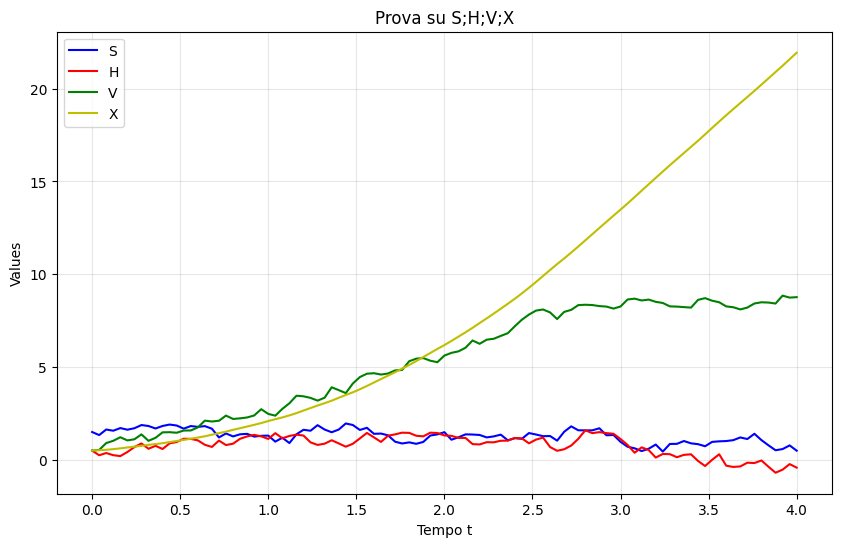

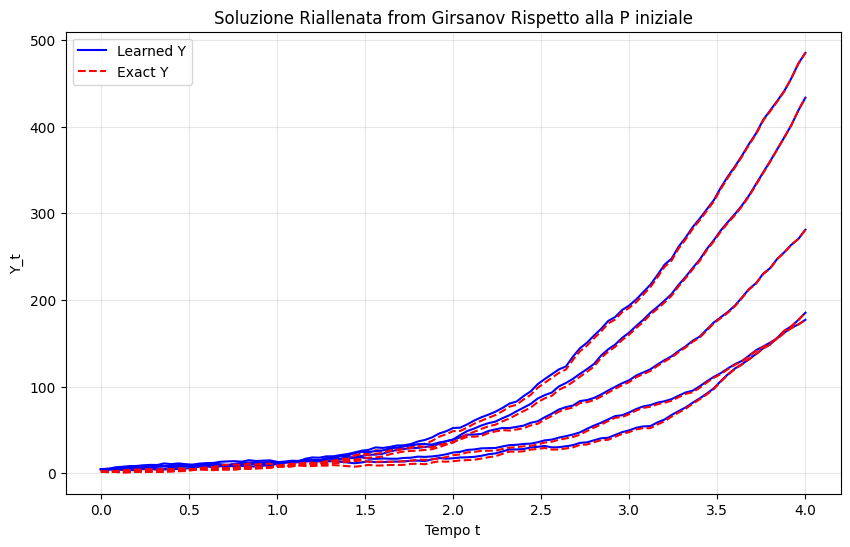

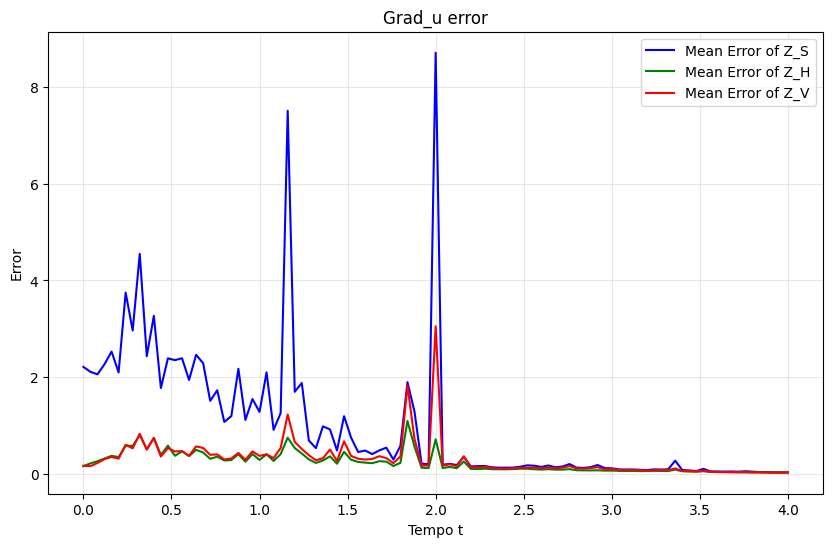

In [17]:
# --- PLOTTING ---
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred, Z_pred = model.predict(Xi, t_test, W_test)

def u_exact(t, Xi_arr):
        S = Xi_arr[:, 0:1]
        H = Xi_arr[:, 1:2]
        V = Xi_arr[:, 2:3]
        X = Xi_arr[:, 3:4]

        return X**2 + S * (V + H)

def z_exact(t, Xi_arr):
        S = Xi_arr[:, 0:1]
        H = Xi_arr[:, 1:2]
        V = Xi_arr[:, 2:3]
        X = Xi_arr[:, 3:4]
        r1 = params['s1'] * (V + H)
        r2 = params['s2'] * S
        r3 = params['s3'] * S
        r4 = np.zeros_like(S)

        return np.stack([r1, r2, r3, r4], axis=1)

Xi_reshaped = X_pred.reshape(-1, D)
t_reshaped = t_test.reshape(-1, 1)

    # Calcolo soluzione esatta sui punti predetti
Y_exact = u_exact(t_reshaped, Xi_reshaped).reshape(M, N+1, 1)
Z_exact = z_exact(t_reshaped, Xi_reshaped).reshape(M, N+1, 4, 1)


exact_Y0 = u_exact(np.array([[0.0]]), Xi)[0,0]
print(f"\nPredicted Y0:   {Y_pred[0,0,0]:.4f}")
print(f"Exact Y0:       {exact_Y0:.4f}")
print(f"Relative Error: {100*np.abs((Y_pred[0,0,0] - exact_Y0)/exact_Y0):.4f}%")

#############
plt.figure(figsize=(10,6))
plt.plot(t_test[0,:,0], X_pred[0,:,0], 'b', label='S')
plt.plot(t_test[0,:,0], X_pred[0,:,1], 'r', label='H')
plt.plot(t_test[0,:,0], X_pred[0,:,2], 'g', label='V')
plt.plot(t_test[0,:,0], X_pred[0,:,3], 'y', label='X')
    # Plot di altre traiettorie per vedere la varianza
plt.title("Prova su S;H;V;X")
plt.xlabel("Tempo t")
plt.ylabel("Values")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
#############


plt.figure(figsize=(10,6))
plt.plot(t_test[0,:,0], Y_pred[0,:,0], 'b', label='Learned Y')
plt.plot(t_test[0,:,0], Y_exact[0,:,0], 'r--', label='Exact Y')
    # Plot di altre traiettorie per vedere la varianza
plt.plot(t_test[1:5,:,0].T, Y_pred[1:5,:,0].T, 'b')
plt.plot(t_test[1:5,:,0].T, Y_exact[1:5,:,0].T, 'r--')
plt.title("Soluzione Riallenata from Girsanov Rispetto alla P iniziale")
plt.xlabel("Tempo t")
plt.ylabel("Y_t")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#print(Z_pred.shape)

plt.figure(figsize=(10,6))
plt.plot(t_test[0,:,0], np.mean(np.abs((Z_pred[:,:,0]-Z_exact[:,:,0,0])/Z_exact[:,:,0,0]),axis=0), 'b', label='Mean Error of Z_S')
plt.plot(t_test[0,:,0], np.mean(np.abs((Z_pred[:,:,1]-Z_exact[:,:,1,0])/Z_exact[:,:,0,0]),axis=0), 'g', label='Mean Error of Z_H')
plt.plot(t_test[0,:,0], np.mean(np.abs((Z_pred[:,:,2]-Z_exact[:,:,2,0])/Z_exact[:,:,0,0]),axis=0), 'r', label='Mean Error of Z_V')
plt.title("Grad_u error")
plt.xlabel("Tempo t")
plt.ylabel("Error")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()